In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
import glob
uni = "20220829_mul_fea3_all_re_1"

path = "/users/yewzzang/work/HEPGNN_4top_resampling/result/" + uni +"/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]




path = "/users/yewzzang/work/HEPGNN_4top_resampling/result/*"+uni +"*/"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]

path = "/users/yewzzang/work/HEPGNN_4top_resampling/result/*"+uni +"*/"+uni +"_weight.csv"
weight_path = glob.glob(path)
weight_list = [file for file in weight_path if file.endswith(".csv")]

path = "/users/yewzzang/work/HEPGNN_4top_resampling/result/*"+uni +"*/*"+uni +"_feature.csv"
feature_path = glob.glob(path)
feature_list = [file for file in feature_path if file.endswith(".csv")]

path = "/users/yewzzang/work/HEPGNN_4top_resampling/result/*"+uni +"*/*"+uni +"_batch.csv"
batch_path = glob.glob(path)
batch_list = [file for file in batch_path if file.endswith(".csv")]


path = "/users/yewzzang/work/HEPGNN_4top_resampling/result/*"+uni +"*/*"+uni +"_Btag.csv"
btag_path = glob.glob(path)
btag_list = [file for file in btag_path if file.endswith(".csv")]


d = train_list
dd = pred_list
ddd = weight_list
# ddd = feature_list
# dddd = pos_list
# ddddd = batch_list
# dddddd = btag_list

In [3]:
d

['/users/yewzzang/work/HEPGNN_4top_resampling/result/20220829_mul_fea3_all_re_1/train.csv']

In [4]:
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.


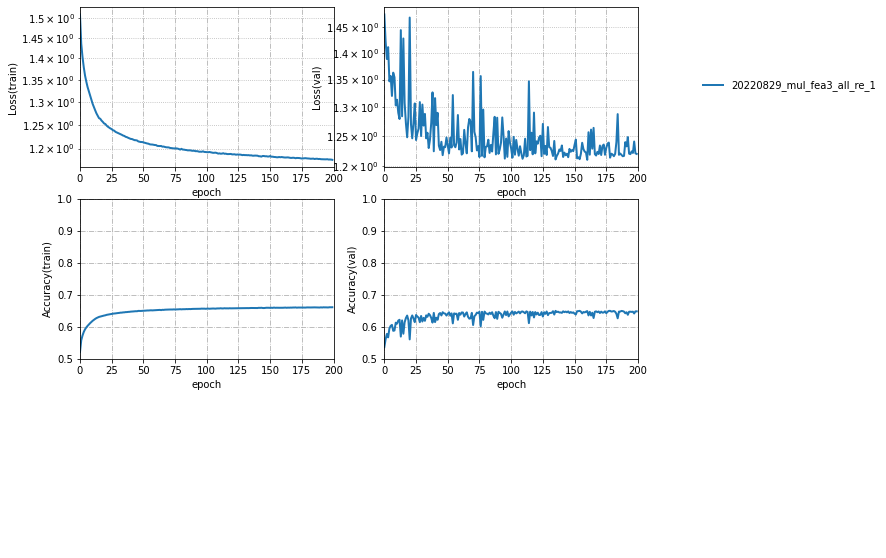

In [5]:
plt.rcParams['figure.figsize'] = (10, 10)
# plt.rcParams['figure.figsize'] = (10, 10)
ax1 = plt.subplot(3, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(3, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')
# ax1 = plt.subplot(3, 2, 1, ylabel='Loss(train)', xlabel='epoch')
# ax2 = plt.subplot(3, 2, 2, ylabel='Loss(val)', xlabel='epoch')
ax3 = plt.subplot(3, 2, 3, ylabel='Accuracy(train)', xlabel='epoch')
ax4 = plt.subplot(3, 2, 4, ylabel='Accuracy(val)', xlabel='epoch')
# ax1.set_ylim([0, 100])
# ax2.set_ylim([0, 100])
ax3.set_ylim([0.5,1.0])
ax4.set_ylim([0.5,1.0])
for ax in (ax1, ax2, ax3, ax4):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([0,200])
lines, labels = [], []

for i in range(len(d)):
    df = pd.read_csv(d[i])

    label = d[i].split('/')[-2]
#     label = d[i]
    l =  ax1.plot(df['loss'], linewidth=2)
    ax2.plot(df['val_loss'], linewidth=2)
    ax3.plot(df['acc'], linewidth=2)
    ax4.plot(df['val_acc'], linewidth=2)


    
    lines.append(l[0])
    labels.append(label)
ax5 = plt.subplot(3,1,3)
ax5.legend(lines, labels, fontsize = 20)
ax5.legend(lines, labels, bbox_to_anchor=(1.1, -4, 7, 7))
ax5.axis('off')
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
plt.show()
plt.close()

In [6]:
dd

['/users/yewzzang/work/HEPGNN_4top_resampling/result/20220829_mul_fea3_all_re_1/20220829_mul_fea3_all_re_1.csv']

In [7]:
df2 = pd.read_csv(dd[0])

In [8]:
df2

,prediction
0,-1.080080
1,0.134001
2,1.718138
3,-7.627779
4,2.580814
...,...
3301135,-0.255276
3301136,-0.765999
3301137,-1.581159
3301138,0.514008


In [9]:
df3 = pd.read_csv(ddd[0])

In [10]:

label = np.array(df3['label'])

In [11]:
prediction = np.array(df2['prediction'])

In [12]:
def softmax(test):
    a = np.exp(test - np.max(test,axis=1,keepdims=True))/np.sum(np.exp(test - np.max(test,axis=1,keepdims=True)),axis=1,keepdims=True)
    return a

In [13]:
prediction = prediction.reshape(-1,3)

In [14]:
prediction = softmax(prediction)

In [15]:
prediction[0]

array([0.04811728, 0.16202026, 0.78986247])

In [16]:
a=prediction[:,0]  ## QCD
b=prediction[:,1]  ## ttbar
c=prediction[:,2]  ## 4top

In [17]:
a.shape

(1100380,)

In [18]:
label.shape

(1100380,)

In [19]:
# for i in range(len(label)):
#     if label[i] == 2:
#         continue
#     elif label[i] == 1:
#         continue
    

In [20]:
def tri_cal(a,b,c):
    x = 0.5 * c + b 
    y = 0.5 * np.sqrt(3) * c
    return x,y

In [21]:
print(tri_cal(1,0,0))
print(tri_cal(0,1,0))
print(tri_cal(0,0,1))

(0.0, 0.0)
(1.0, 0.0)
(0.5, 0.8660254037844386)


In [22]:
# x = 0.5 * a + c 
# y = 0.5 * np.sqrt(3) * a

x = 0.5 * c + b 
y = 0.5 * np.sqrt(3) * c

In [23]:
# QCD = np.array([0.5,0.5*np.sqrt(3)])
# RPV = np.array([0,0])
# TTbar = np.array([1,0])
xx = np.array([0.5, 0, 1, 0.5])
yy = np.array([0.5*np.sqrt(3), 0, 0, 0.5*np.sqrt(3)])

In [24]:
x_QCD = x[label == 0]
y_QCD = y[label == 0]
x_TTbar = x[label == 1]
y_TTbar = y[label == 1]
x_4top = x[label == 2] 
y_4top = y[label == 2]

In [25]:
x[label==0].shape

(73130,)

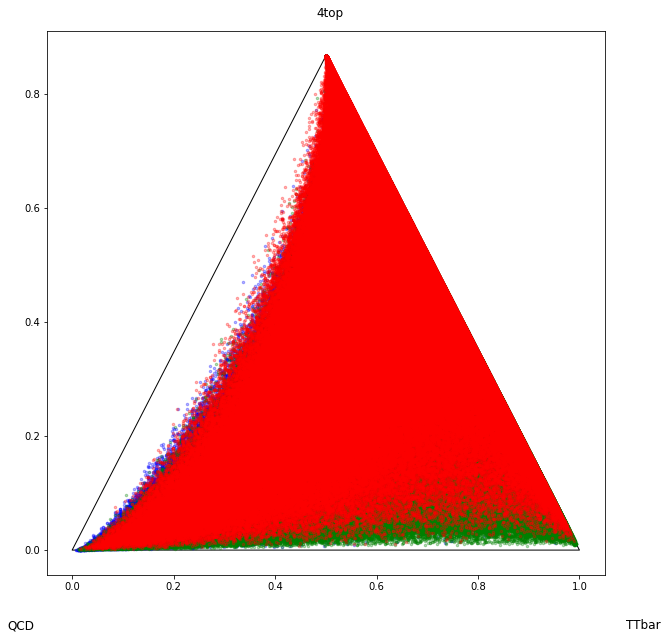

In [26]:
plt.plot(xx, yy, color = 'black', linewidth=1)
plt.plot(x_QCD, y_QCD, '.', color = 'blue',alpha= 0.3)
plt.plot(x_TTbar, y_TTbar, '.', color = 'green',alpha= 0.3)
plt.plot(x_4top, y_4top, '.', color = 'red',alpha= 0.3)
plt.gcf().text(0.07, 0.05, 'QCD', fontsize=12,color='black')
plt.gcf().text(0.93, 0.05, 'TTbar', fontsize=12,color='black')
plt.gcf().text(0.5, 0.9, '4top', fontsize=12,color='black')
plt.show()

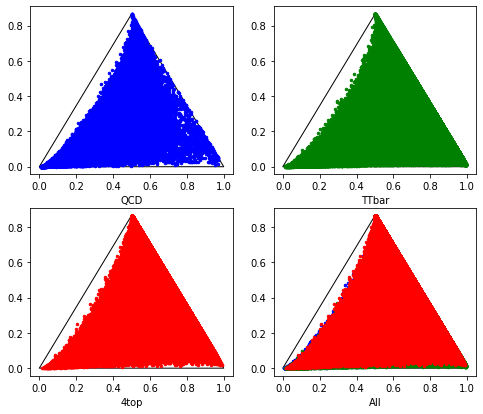

In [27]:
plt.rcParams['figure.figsize'] = (4*2, 3.5*3)
ax1 = plt.subplot(3, 2, 1, xlabel='QCD')
ax2 = plt.subplot(3, 2, 2, xlabel='TTbar')
ax3 = plt.subplot(3, 2, 3, xlabel='4top')
ax4 = plt.subplot(3, 2, 4, xlabel='All')
ax1.plot(xx, yy, color = 'black', linewidth=1)
ax2.plot(xx, yy, color = 'black', linewidth=1)
ax3.plot(xx, yy, color = 'black', linewidth=1)
ax4.plot(xx, yy, color = 'black', linewidth=1)
ax1.plot(x_QCD, y_QCD, '.', color = 'blue')
ax2.plot(x_TTbar, y_TTbar, '.', color = 'green')
ax3.plot(x_4top, y_4top, '.', color = 'red')
ax4.plot(x_QCD, y_QCD, '.', color = 'blue')
ax4.plot(x_TTbar, y_TTbar, '.', color = 'green')
ax4.plot(x_4top, y_4top, '.', color = 'red')



In [28]:
a[label==0]

array([0.64389068, 0.55011595, 0.39025224, ..., 0.3244567 , 0.53447305,
       0.50231622])

In [29]:
a[label==1]

array([4.81172770e-02, 2.99278550e-05, 1.11867395e-01, ...,
       1.07114018e-03, 3.82727118e-01, 6.26514235e-01])

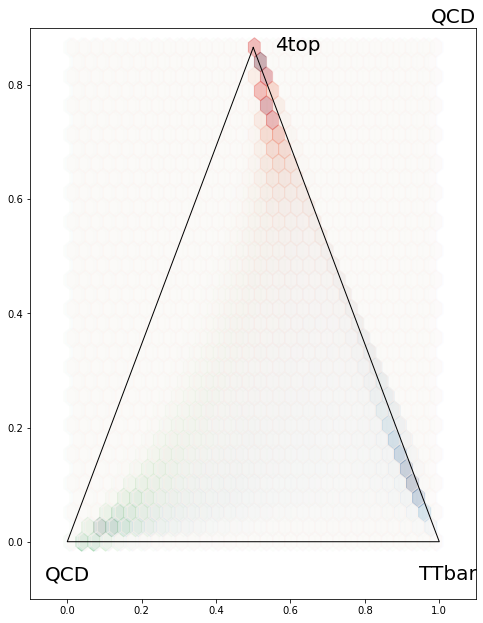

In [30]:
plt.plot(xx, yy, color = 'black', linewidth=1)
plt.hexbin(x[label==0], y[label==0], gridsize = 30, cmap ='Greens',alpha=0.3)
plt.hexbin(x[label==1], y[label==1], gridsize = 30, cmap ='Blues',alpha=0.3) 
plt.hexbin(x[label==2], y[label==2], gridsize = 30, cmap ='Reds',alpha=0.3) 
plt.gcf().text(0.15, 0.15, 'QCD', fontsize=20,color='black')
plt.gcf().text(0.8, 0.15, 'TTbar', fontsize=20,color='black')
plt.gcf().text(0.55, 0.85, '4top', fontsize=20,color='black')
plt.title('QCD',fontsize=20,loc='right')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,0.9])
plt.show()



In [31]:
from matplotlib.colors import LinearSegmentedColormap

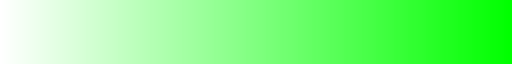

In [32]:
reds = ['#FFFFFF','#FF0000']
red_cmap = LinearSegmentedColormap.from_list('my_cmap',reds)
red_cmap

blues = ['#FFFFFF','#0000FF']
blue_cmap = LinearSegmentedColormap.from_list('my_cmap',blues)
blue_cmap

greens = ['#FFFFFF','#00FF00']
green_cmap = LinearSegmentedColormap.from_list('my_cmap',greens)
green_cmap


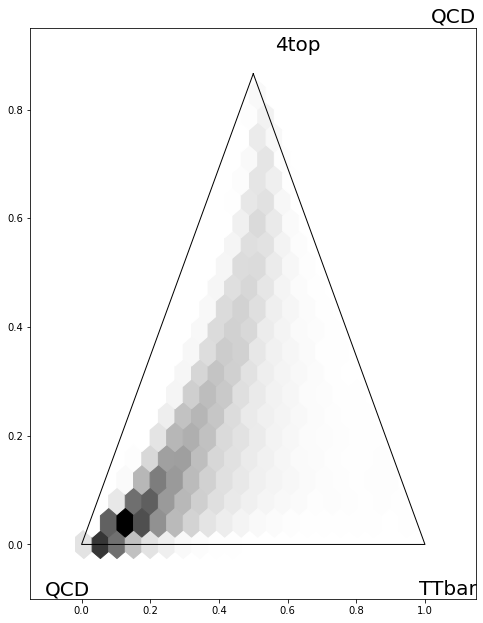

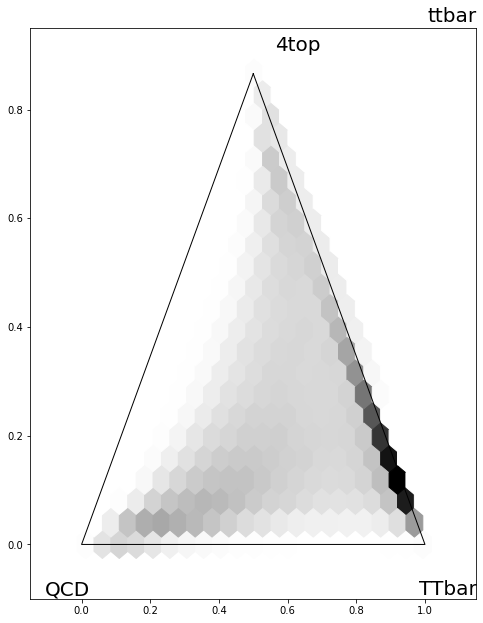

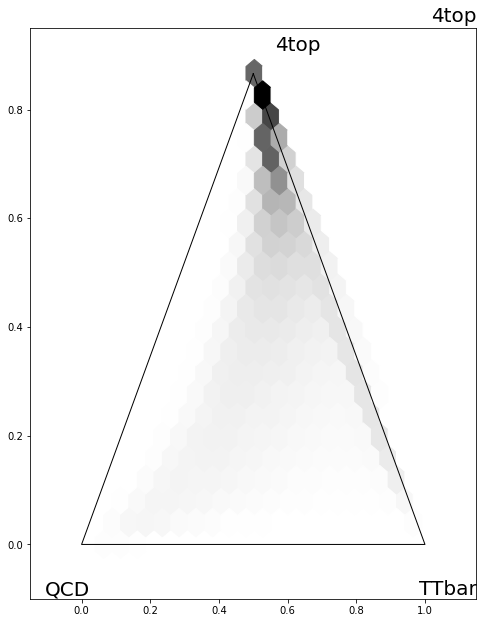

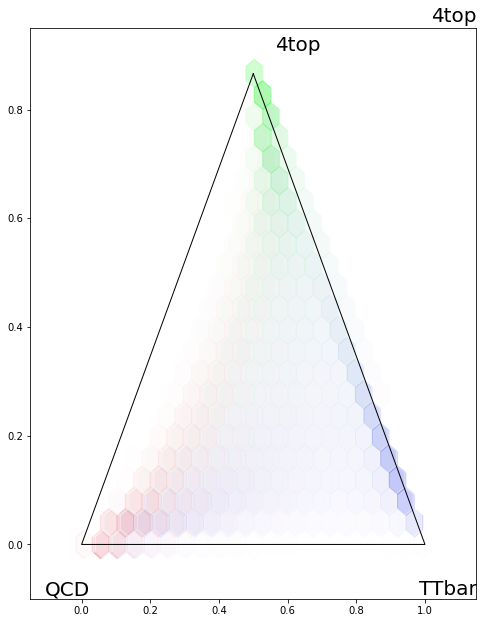

In [33]:
plt.plot(xx, yy, color = 'black', linewidth=1)
plt.hexbin(x[label==0], y[label==0], gridsize = 20, cmap ='binary')
plt.gcf().text(0.15, 0.13, 'QCD', fontsize=20,color='black')
plt.gcf().text(0.8, 0.13, 'TTbar', fontsize=20,color='black')
plt.gcf().text(0.55, 0.85, '4top', fontsize=20,color='black')
plt.title('QCD',fontsize=20,loc='right')
plt.xlim([-0.15,1.15])
plt.ylim([-0.1,0.95])
plt.show()


plt.plot(xx, yy, color = 'black', linewidth=1)
plt.hexbin(x[label==1], y[label==1], gridsize = 20, cmap ='binary') 
plt.gcf().text(0.15, 0.13, 'QCD', fontsize=20,color='black')
plt.gcf().text(0.8, 0.13, 'TTbar', fontsize=20,color='black')
plt.gcf().text(0.55, 0.85, '4top', fontsize=20,color='black')
plt.title('ttbar',fontsize=20,loc='right')
plt.xlim([-0.15,1.15])
plt.ylim([-0.1,0.95])
plt.show()



plt.plot(xx, yy, color = 'black', linewidth=1)
plt.hexbin(x[label==2], y[label==2], gridsize = 20, cmap ='binary') 
plt.gcf().text(0.15, 0.13, 'QCD', fontsize=20,color='black')
plt.gcf().text(0.8, 0.13, 'TTbar', fontsize=20,color='black')
plt.gcf().text(0.55, 0.85, '4top', fontsize=20,color='black')
plt.title('4top',fontsize=20,loc='right')
plt.xlim([-0.15,1.15])
plt.ylim([-0.1,0.95])
plt.show()

plt.plot(xx, yy, color = 'black', linewidth=1)
plt.hexbin(x[label==0], y[label==0], gridsize = 20, cmap =red_cmap,alpha=0.3)
plt.hexbin(x[label==1], y[label==1], gridsize = 20, cmap =blue_cmap,alpha=0.3)
plt.hexbin(x[label==2], y[label==2], gridsize = 20, cmap =green_cmap,alpha=0.3)

plt.gcf().text(0.15, 0.13, 'QCD', fontsize=20,color='black')
plt.gcf().text(0.8, 0.13, 'TTbar', fontsize=20,color='black')
plt.gcf().text(0.55, 0.85, '4top', fontsize=20,color='black')
plt.title('4top',fontsize=20,loc='right')
plt.xlim([-0.15,1.15])
plt.ylim([-0.1,0.95])
plt.show()


In [34]:
x[label==2].min()

0.01608477667740775

In [35]:
# plt.hexbin(a[label==0], b[label==0], C = c[label==0], gridsize = 500, cmap ='Greens') 
# plt.title('QCD') 
# plt.show() 
# plt.hexbin(a[label==1], b[label==1], C = c[label==1], gridsize = 500, cmap ='Greens') 
# plt.title('ttbar') 
# plt.show() 
# plt.hexbin(a[label==2], b[label==2], C = c[label==2], gridsize = 500, cmap ='Greens') 
# plt.title('4top') 
# plt.show() 

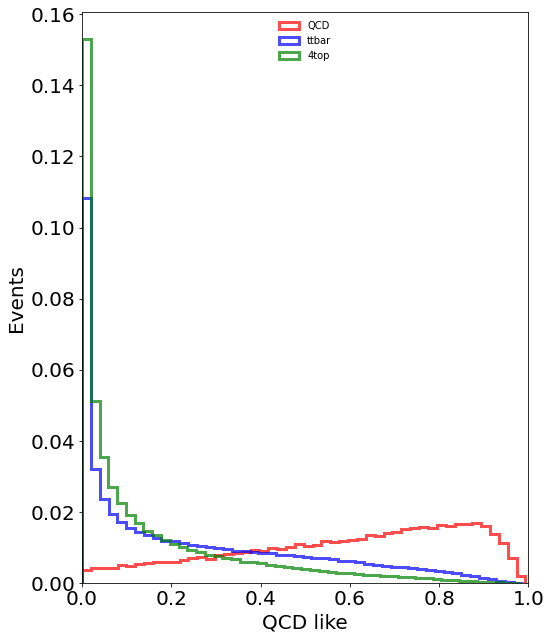

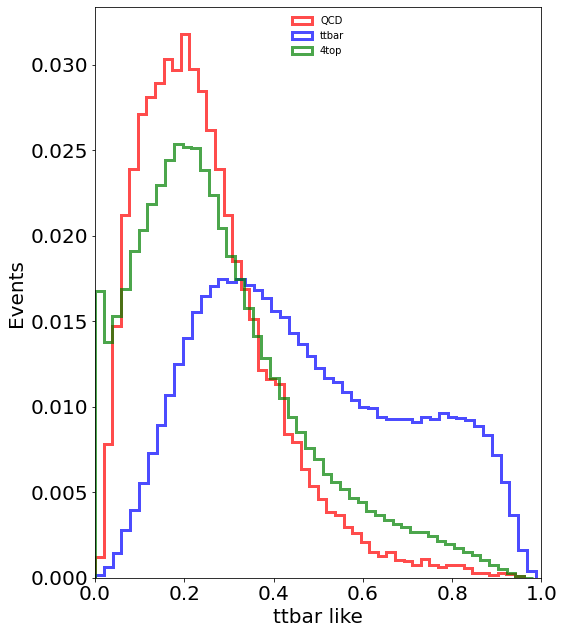

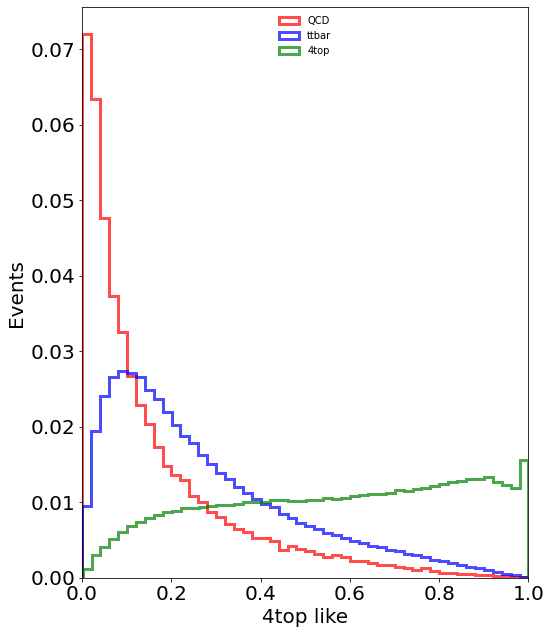

<Figure size 576x756 with 0 Axes>

In [36]:
df3['scaledWeight'] = df3['weight']*df3['scale']

df_QCD = a[label==0]
df_ttbar = a[label==1]
df_4top = a[label==2]

plt.hist(df_QCD*100, histtype='step', 
         weights=df3['scaledWeight'][label==0], density = 'True', 
         bins=50, alpha=0.7, color='red', 
         label='QCD', linewidth=3)
plt.hist(df_ttbar*100, histtype='step', 
         weights=df3['scaledWeight'][label==1], density = 'True', 
         bins=50, alpha=0.7, color='blue', 
         label='ttbar', linewidth=3)
plt.hist(df_4top*100, histtype='step', 
         weights=df3['scaledWeight'][label==2], density = 'True', 
         bins=50, alpha=0.7, color='green', 
         label='4top', linewidth=3)

plt.xticks(np.arange(0, 101, step=20),["{}".format(x*0.01) for x in np.arange(0, 101,step=20)],fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(0, 100)
plt.xlabel('QCD like',fontsize=20)
plt.ylabel('Events',fontsize=20)
plt.legend(loc = 'upper center')

plt.show()
plt.clf()


df_QCD = b[label==0]
df_ttbar = b[label==1]
df_4top = b[label==2]

plt.hist(df_QCD*100, histtype='step', 
         weights=df3['scaledWeight'][label==0], density = 'True', 
         bins=50, alpha=0.7, color='red', 
         label='QCD', linewidth=3)
plt.hist(df_ttbar*100, histtype='step', 
         weights=df3['scaledWeight'][label==1], density = 'True', 
         bins=50, alpha=0.7, color='blue', 
         label='ttbar', linewidth=3)
plt.hist(df_4top*100, histtype='step', 
         weights=df3['scaledWeight'][label==2], density = 'True', 
         bins=50, alpha=0.7, color='green', 
         label='4top', linewidth=3)

plt.xticks(np.arange(0, 101, step=20),["{}".format(x*0.01) for x in np.arange(0, 101,step=20)],fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(0, 100)
plt.xlabel('ttbar like',fontsize=20)
plt.ylabel('Events',fontsize=20)
plt.legend(loc = 'upper center')

plt.show()
plt.clf()


df_QCD = c[label==0]
df_ttbar = c[label==1]
df_4top = c[label==2]

plt.hist(df_QCD*100, histtype='step', 
         weights=df3['scaledWeight'][label==0], density = 'True', 
         bins=50, alpha=0.7, color='red', 
         label='QCD', linewidth=3)
plt.hist(df_ttbar*100, histtype='step', 
         weights=df3['scaledWeight'][label==1], density = 'True', 
         bins=50, alpha=0.7, color='blue', 
         label='ttbar', linewidth=3)
plt.hist(df_4top*100, histtype='step', 
         weights=df3['scaledWeight'][label==2], density = 'True', 
         bins=50, alpha=0.7, color='green', 
         label='4top', linewidth=3)

plt.xticks(np.arange(0, 101, step=20),["{}".format(x*0.01) for x in np.arange(0, 101,step=20)],fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(0, 100)
plt.xlabel('4top like',fontsize=20)
plt.ylabel('Events',fontsize=20)
plt.legend(loc = 'upper center')

plt.show()
plt.clf()

